In [2]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

from PIL import Image

from collections import defaultdict
import json

plt.rcParams['figure.figsize'] = (15,15)

In [5]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2022-10-10 23:18:35--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.164.25
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.164.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  81.2MB/s    in 4m 0s   

2022-10-10 23:22:36 (76.7 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [6]:
!unzip train2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2017/000000259556.jpg  
 extracting: train2017/000000381931.jpg  
 extracting: train2017/000000569592.jpg  
 extracting: train2017/000000229396.jpg  
 extracting: train2017/000000488990.jpg  
 extracting: train2017/000000348684.jpg  
 extracting: train2017/000000234031.jpg  
 extracting: train2017/000000563584.jpg  
 extracting: train2017/000000276069.jpg  
 extracting: train2017/000000401194.jpg  
 extracting: train2017/000000502089.jpg  
 extracting: train2017/000000192183.jpg  
 extracting: train2017/000000425127.jpg  
 extracting: train2017/000000126766.jpg  
 extracting: train2017/000000324161.jpg  
 extracting: train2017/000000452746.jpg  
 extracting: train2017/000000423782.jpg  
 extracting: train2017/000000546343.jpg  
 extracting: train2017/000000249290.jpg  
 extracting: train2017/000000025529.jpg  
 extracting: train2017/000000316928.jpg  
 extracting: train2017/000000337866.jpg  
 extracting: train2017/00

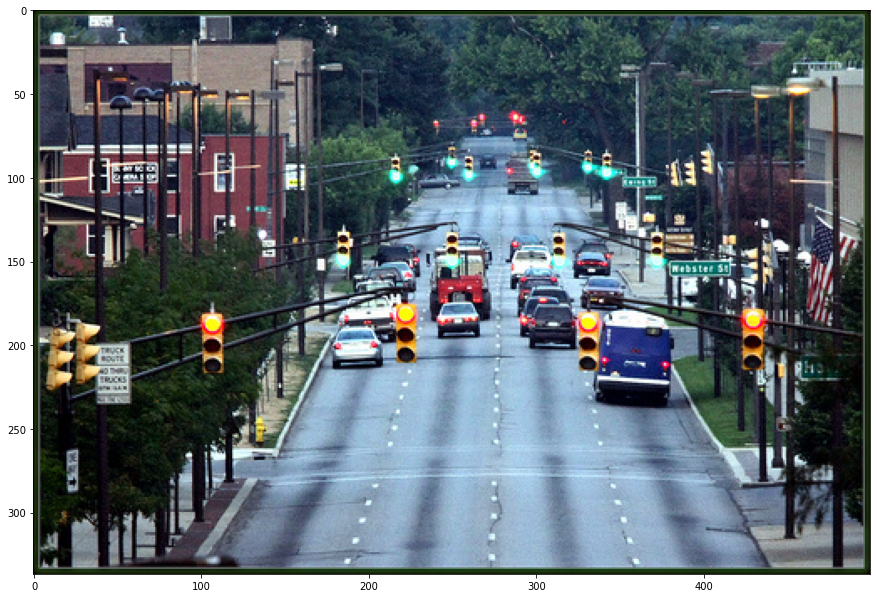

In [7]:
image_name = "./train2017/000000430122.jpg"

img = Image.open(image_name)
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

In [8]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2022-10-10 23:31:21--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.196.153
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.196.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  98.4MB/s    in 2.5s    

2022-10-10 23:31:24 (98.4 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [9]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [12]:
images_ids_annotations = defaultdict(list)  

path = './annotations/instances_train2017.json'
file = open(path)
anns = json.load(file)

for ann in anns['annotations']:
  image_id = ann['image_id']
  images_ids_annotations[image_id].append(ann)

In [13]:
#Get mappiing category_id to category name
category_id_to_name = dict()
for ann in anns['categories']:
  category_id_to_name[ann['id']] = ann['name']

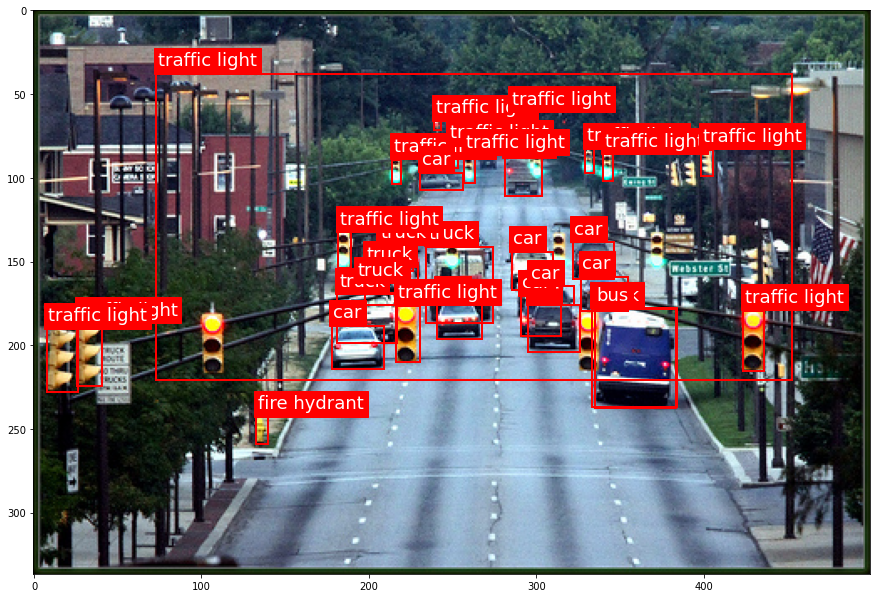

In [18]:
image_name = "./train2017/000000430122.jpg"
image_id = int(image_name.split("/")[-1].split(".")[0])

img = Image.open(image_name)
fig, ax = plt.subplots()

image_anns = images_ids_annotations[image_id]

for image_ann in image_anns:
  bbox = image_ann['bbox']
  name = category_id_to_name[image_ann['category_id']]
  x = float(bbox[0])
  y = float(bbox[1])
  w = float(bbox[2])
  h = float(bbox[3])

  plt.text(x+1, y-5, name, fontdict={'fontsize':18.0, 'fontweight':'medium', 'color': 'white', 'backgroundcolor': 'red'})
  bb = patches.Rectangle((x,y), w, h, linewidth=2, edgecolor='red', facecolor='none')
  ax.add_patch(bb)

ax.imshow(img)
plt.show()